Text(0.5, 1.0, 'Filter Kucing Tidur')

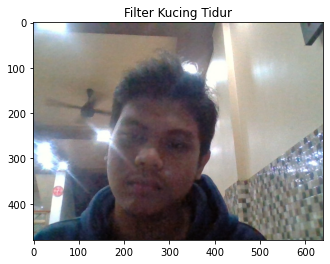

In [1]:
import cv2
import numpy as np

mask = [
    cv2.imread('anonym.png', -1),
    cv2.imread('anonym-kiri.png', -1),
    cv2.imread('anonym-kanan.png', -1)
]


def setFilter(source, overlay, position=(0, 0)):
    overlay = cv2.resize(overlay, (0, 0), fx=1, fy=1)
    h, w, _ = overlay.shape
    row, col, _ = source.shape
    y, x = position[0], position[1]
    
    for i in range(h):
        for j in range(w):
            if x + i >= row or y + j >= col:
                continue
            
            alpha = float(overlay[i][j][3] / 255.0)
            source[x + i][y + j] = alpha * overlay[i][j][:3] + (1 - alpha) * source[x + i][y + j]
    
    return source

def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    
    faces = face_cascade.detectMultiScale(frame_gray)
    right_eye = right_eye_cascade.detectMultiScale(frame_gray)
    left_eye = left_eye_cascade.detectMultiScale(frame_gray)
    
    if len(right_eye) != 0:
        for (x,y,w,h) in faces:
            if h > 0 and w > 0:
                position_min = int(y +  0.0 * h / 2.5)
                position_max = int(y +  5.0 * h / 4.0)

                mask_position = position_max - position_min
                mask_source   = frame[position_min:position_max, x:x + w]
                mask_overlay  = cv2.resize(mask[1], (w, mask_position), interpolation=cv2.INTER_CUBIC)

                setFilter(mask_source, mask_overlay)
    elif len(left_eye) != 0:
        for (x,y,w,h) in faces:
            if h > 0 and w > 0:
                position_min = int(y +  0.0 * h / 2.5)
                position_max = int(y +  5.0 * h / 4.0)

                mask_position = position_max - position_min
                mask_source   = frame[position_min:position_max, x:x + w]
                mask_overlay  = cv2.resize(mask[0], (w, mask_position), interpolation=cv2.INTER_CUBIC)

                setFilter(mask_source, mask_overlay)
        
    cv2.imshow('Capture - Face detection', frame)

face_cascade = cv2.CascadeClassifier("cascades/haarcascade_frontalface_alt.xml")
right_eye_cascade = cv2.CascadeClassifier("cascades/haarcascade_righteye_2splits.xml")
left_eye_cascade = cv2.CascadeClassifier("cascades/haarcascade_lefteye_2splits.xml")

cap = cv2.VideoCapture(0)

if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    
    detectAndDisplay(frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Filter Kucing Tidur")

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse

mask = [
    cv.imread('anonym.png', -1),
    cv.imread('anonym-kiri.png', -1)
]

def setFilter(source, overlay, position=(0, 0)):
    overlay = cv.resize(overlay, (0, 0), fx=1, fy=1)
    h, w, _ = overlay.shape
    row, col, _ = source.shape
    y, x = position[0], position[1]
    
    for i in range(h):
        for j in range(w):
            if x + i >= row or y + j >= col:
                continue
            
            alpha = float(overlay[i][j][3] / 255.0)
            source[x + i][y + j] = alpha * overlay[i][j][:3] + (1 - alpha) * source[x + i][y + j]
    
    return source

def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        faceROI = frame_gray[y:y+h,x:x+w]
        eyes = eyes_cascade.detectMultiScale(faceROI)
        
        if h > 0 and w > 0:
            position_min = int(y +  0.0 * h / 2.5)
            position_max = int(y +  5.0 * h / 4.0)

            mask_position = position_max - position_min
            mask_source   = frame[position_min:position_max, x:x + w]
            if len(eyes) == 1:
                mask_overlay  = cv.resize(mask[0], (w, mask_position), interpolation=cv.INTER_CUBIC)
            else:
                mask_overlay  = cv.resize(mask[1], (w, mask_position), interpolation=cv.INTER_CUBIC)
            
            setFilter(mask_source, mask_overlay)

    cv.imshow('Capture - Face detection', frame)
    
face_cascade_name = 'cascades/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'cascades/haarcascade_eye_tree_eyeglasses.xml'
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)
camera_device = 0

#-- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv.waitKey(10) == 27:
        break

cap.release()
cv.destroyAllWindows()

from matplotlib import pyplot as plt

plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
plt.title("Filter Camera")

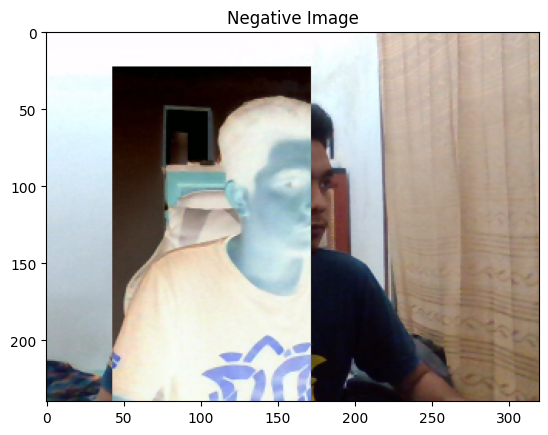

In [6]:
#Berikut ini merupakan code yang menampilkan video live stream dari kamera
#kemudian anda dapat menggunakan mouse input dan membuat persegi di mana
#gambar pada persegi akan diubah menjadi citra negatif

import cv2
import numpy as np
from matplotlib import pyplot as plt

def draw_rectangle(event, x, y, flags, params):
    global x_init, y_init, drawing, top_left_pt, bottom_right_pt
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_init, y_init = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_pt = (min(x_init, x), min(y_init, y))
            bottom_right_pt = (max(x_init, x), max(y_init, y))
            img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x] #proses mengubah jadi negatif
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_pt = (min(x_init, x), min(y_init, y))
        bottom_right_pt = (max(x_init, x), max(y_init, y))
        img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x] #proses mengubah jadi negatif

if __name__=='__main__':
    drawing = False
    top_left_pt, bottom_right_pt = (-1,-1), (-1,-1)
    
    cap = cv2.VideoCapture(0)
    
    # Check if the webcam is opened correctly
    if not cap.isOpened():
        raise IOError("Cannot open webcam")
        
    cv2.namedWindow('Webcam')
    cv2.setMouseCallback('Webcam', draw_rectangle)
    
    while True:
        ret, frame = cap.read()
        img = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        
        (x0,y0), (x1,y1) = top_left_pt, bottom_right_pt
        img[y0:y1, x0:x1] = 255 - img[y0:y1, x0:x1]
        
        cv2.imshow('Webcam', img)
        
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

    # show output
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Negative Image")
    plt.show()